

## What is here
* This is a simple example of interactive notebook. 
* Considering a model of a three span continouus beam, student can interactively controll the position of concentrated vertical force and the internal force diagrams are updated.

**You need to run all cells first to see the notebook in action: just select icon with two arrows pointing to the right to "Restart the kernel and run all cells"**

In [1]:
%pip install drawsvg
%pip install -q ipywidgets

import sys
sys.path.append("../flip")


import numpy
import drawsvg
import ipywidgets

from flip import (
    Domain, Solver,
    Material, CrossSection, Node, Beam2D, DofID,
    UniformDistributedLoad,
    PointLoadOnElement,
    plot_model_drawsvg, plot_internal_forces_on_structure,
)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Solution took 0.001 sec


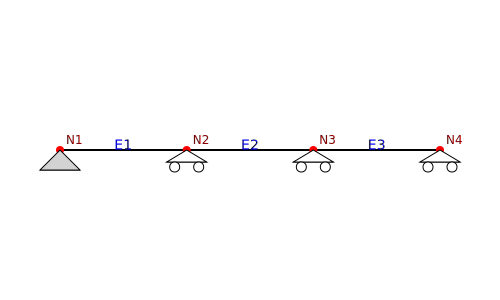

In [17]:
# Create solver
sol = Solver()
dom = sol.domain

# Create materials and cross sections
dom.add_material(Material("C30", e=30e9, g=12e9))
dom.add_cs(CrossSection("rect", a=0.3*0.5, iy=0.3*0.5**3/12, k=1.0e32, rho=25e3))   

# Create nodes
dom.add_node(Node(1, dom, coords=[0.0, 0.0, 0.0], bcs=[DofID.Dx, DofID.Dz]))
dom.add_node(Node(2, dom, coords=[4.0, 0.0, 0.0], bcs=[DofID.Dz]))
dom.add_node(Node(3, dom, coords=[8.0, 0.0, 0.0], bcs=[DofID.Dz]))
dom.add_node(Node(4, dom, coords=[12.0, 0.0, 0.0], bcs=[DofID.Dz]))

# Create elements
dom.add_element(Beam2D(1, dom, nodes=[1, 2], mat="C30", cs="rect"))
dom.add_element(Beam2D(2, dom, nodes=[2, 3], mat="C30", cs="rect"))
dom.add_element(Beam2D(3, dom, nodes=[3, 4], mat="C30", cs="rect"))

# loads
dom.apply_element_load(1, PointLoadOnElement(fz=4.0,a=1.0))

# solve
sol.solve()

# Plot model geometry (and optionally deformed shape), SVG outputs
plot_model_drawsvg(dom, "simple_beam_model.svg", width_px=500, height_px=300, show_deformed=False, deform_scale=6000, margin=60)
#plot_model_diagram(dom, "V", "simple_beam_shear.svg")


In [22]:
def update (x=1):
    dom.element_loads={}
    sol.code_generated = False
    if (x<4):
        el = 1
    elif (x<8):
        el = 2
    else: 
        el =3
    dom.apply_element_load(el, PointLoadOnElement(fz=4.0,a=x - (el-1)*4))
    

    # solve
    sol.solve()
    #print (sol.r)
    return plot_internal_forces_on_structure(dom, "simple_beam_moment.svg", width_px=800, height_px=300, margin=60, diagrams=["M", "V"] , scale=1.0)


In [23]:
style = {'description_width': 'initial', 'width': '800px'}
x = ipywidgets.FloatSlider(value=1,min=0,max=12,step=0.2,description='Position of Vertical force (f=4.0):', continuous_update=False, style=style, layout=ipywidgets.Layout(width='400px'))
ipywidgets.interact(update, x=x);
#update(x=3).rasterize()


interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Position of Vertical force …